In [44]:
#Neural Network
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.layers import Bidirectional, GlobalMaxPool1D

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

df = pd.read_csv("C:/Users/KHJ/cold_heat/data/lee_nhis_cold_daily_regional.csv", engine='python')
tb_sido = pd.read_csv("C:/Users/KHJ/cold_heat/data/sido_code.csv", engine='python')

dict_sido = tb_sido.set_index('name')['code'].to_dict()

df.region =df.region.map(dict_sido)

## 시도별 지역 코드 불러오기

In [45]:
dict_sido

{'강원': 32,
 '경기': 31,
 '경남': 38,
 '경북': 37,
 '광주': 24,
 '대구': 22,
 '대전': 25,
 '부산': 21,
 '서울': 11,
 '울산': 26,
 '인천': 23,
 '전남': 36,
 '전국': 0,
 '전북': 35,
 '제주': 39,
 '충북': 33,
 '충남': 34,
 '세종': 50}

In [46]:
#서울
df = df[df.region == 11]

## 일요일, 공휴일 제거

In [47]:
#요일 구하기
from datetime import date
def weekday(y,m,h):
    y = y.astype('int')
    m = m.astype('int')
    h = h.astype('int')
    
    return date(y,m,h).weekday()

In [48]:
df['weekday'] = df.apply(lambda x: weekday(x.kma_year, x.kma_month, x.kma_date), axis=1)
df = df[df.weekday!=6]
df = df.reset_index()
y = df.TOTAL
df.drop("index",1,inplace=True)

In [49]:
df = df.drop(df[(df.kma_month==12) & (df.kma_date==25)].index)
df = df.drop(df[(df.kma_month==1) & (df.kma_date==1)].index)
df = df.drop(df[(df.kma_month==3) & (df.kma_date==1)].index)
#(1,1) (3,1) (12,25) 공휴일 제거
#설날 지우기
df = df.drop(df[(df.kma_year==2003) & (df.kma_month==1) & (df.kma_date==31)].index)
df = df.drop(df[(df.kma_year==2003) & (df.kma_month==2) & (df.kma_date==1)].index)
#df = df.drop(df[(df.kma_year==12) & (df.kma_month==3) & (df.kma_date==1)].index)
df = df.drop(df[(df.kma_year==2004) & (df.kma_month==1) & (df.kma_date==21)].index)
df = df.drop(df[(df.kma_year==2004) & (df.kma_month==1) & (df.kma_date==22)].index)
df = df.drop(df[(df.kma_year==2004) & (df.kma_month==1) & (df.kma_date==23)].index)
df = df.drop(df[(df.kma_year==2005) & (df.kma_month==2) & (df.kma_date==8)].index)
df = df.drop(df[(df.kma_year==2005) & (df.kma_month==2) & (df.kma_date==9)].index)
df = df.drop(df[(df.kma_year==2005) & (df.kma_month==2) & (df.kma_date==10)].index)
df = df.drop(df[(df.kma_year==2006) & (df.kma_month==1) & (df.kma_date==28)].index)
df = df.drop(df[(df.kma_year==2006) & (df.kma_month==1) & (df.kma_date==30)].index)
df = df.drop(df[(df.kma_year==2007) & (df.kma_month==1) & (df.kma_date==17)].index)
df = df.drop(df[(df.kma_year==2007) & (df.kma_month==1) & (df.kma_date==19)].index)
df = df.drop(df[(df.kma_year==2008) & (df.kma_month==2) & (df.kma_date==6)].index)
df = df.drop(df[(df.kma_year==2008) & (df.kma_month==2) & (df.kma_date==7)].index)
df = df.drop(df[(df.kma_year==2008) & (df.kma_month==2) & (df.kma_date==8)].index)
df = df.drop(df[(df.kma_year==2009) & (df.kma_month==1) & (df.kma_date==26)].index)
df = df.drop(df[(df.kma_year==2009) & (df.kma_month==1) & (df.kma_date==27)].index)
df = df.drop(df[(df.kma_year==2010) & (df.kma_month==2) & (df.kma_date==13)].index)
df = df.drop(df[(df.kma_year==2010) & (df.kma_month==2) & (df.kma_date==15)].index)
df = df.drop(df[(df.kma_year==2011) & (df.kma_month==2) & (df.kma_date==2)].index)
df = df.drop(df[(df.kma_year==2011) & (df.kma_month==2) & (df.kma_date==3)].index)
df = df.drop(df[(df.kma_year==2011) & (df.kma_month==2) & (df.kma_date==4)].index)
df = df.drop(df[(df.kma_year==2012) & (df.kma_month==1) & (df.kma_date==23)].index)
df = df.drop(df[(df.kma_year==2012) & (df.kma_month==1) & (df.kma_date==24)].index)
df = df.drop(df[(df.kma_year==2013) & (df.kma_month==2) & (df.kma_date==9)].index)
df = df.drop(df[(df.kma_year==2013) & (df.kma_month==2) & (df.kma_date==11)].index)
df = df.drop(df[(df.kma_year==2014) & (df.kma_month==1) & (df.kma_date==30)].index)
df = df.drop(df[(df.kma_year==2014) & (df.kma_month==1) & (df.kma_date==31)].index)
df = df.drop(df[(df.kma_year==2014) & (df.kma_month==2) & (df.kma_date==1)].index)
df = df.drop(df[(df.kma_year==2015) & (df.kma_month==2) & (df.kma_date==18)].index)
df = df.drop(df[(df.kma_year==2015) & (df.kma_month==2) & (df.kma_date==19)].index)
df = df.drop(df[(df.kma_year==2015) & (df.kma_month==2) & (df.kma_date==20)].index)
df = df.drop(df[(df.kma_year==2016) & (df.kma_month==2) & (df.kma_date==8)].index)
df = df.drop(df[(df.kma_year==2016) & (df.kma_month==2) & (df.kma_date==9)].index)
df = df.drop(df[(df.kma_year==2016) & (df.kma_month==2) & (df.kma_date==10)].index)
df = df.drop(df[(df.kma_year==2017) & (df.kma_month==1) & (df.kma_date==27)].index)
df = df.drop(df[(df.kma_year==2017) & (df.kma_month==1) & (df.kma_date==28)].index)
df = df.drop(df[(df.kma_year==2017) & (df.kma_month==1) & (df.kma_date==30)].index)

In [50]:
df = df.reset_index()
y = df.TOTAL
df.drop("TOTAL",1,inplace=True)
df.drop("index",1,inplace=True)

## 데이터 구간별 나누기

In [51]:
df[1123:1496]

,kma_year,kma_month,kma_date,region,lo_kma_id,lag1_lo_kma_id,lag2_lo_kma_id,lag3_lo_kma_id,hilo_kma_id,lag1_hilo_kma_id,...,lag3_hilo_kma_id,wimax_kma_id,lag1_wimax_kma_id,lag2_wimax_kma_id,lag3_wimax_kma_id,mt_lag1,lo_lag1,cold_warn0,cold_notice0,weekday
1123,2012,1,2,11,-8.3,-6.9,-6.0,-6.4,7.1,7.3,...,8.3,4.6,7.0,3.5,4.1,-1.8,-1.4,0,0,0
1124,2012,1,3,11,-6.8,-8.3,-6.9,-6.0,6.6,7.1,...,7.4,5.8,4.6,7.0,3.5,0.3,1.5,0,0,1
1125,2012,1,4,11,-9.6,-6.8,-8.3,-6.9,5.3,6.6,...,7.3,5.3,5.8,4.6,7.0,-2.9,-2.8,0,0,2
1126,2012,1,5,11,-9.8,-9.6,-6.8,-8.3,8.5,5.3,...,7.1,3.8,5.3,5.8,4.6,1.7,-0.2,0,0,3
1127,2012,1,6,11,-5.6,-9.8,-9.6,-6.8,6.9,8.5,...,6.6,5.0,3.8,5.3,5.8,2.9,4.2,0,0,4
1128,2012,1,7,11,-8.0,-5.6,-9.8,-9.6,10.0,6.9,...,5.3,3.2,5.0,3.8,5.3,-1.0,-2.4,0,0,5
1129,2012,1,9,11,-1.8,-5.5,-8.0,-5.6,4.5,5.9,...,6.9,4.5,4.6,3.2,5.0,2.2,3.7,0,0,0
1130,2012,1,10,11,-5.8,-1.8,-5.5,-8.0,7.3,4.5,...,10.0,4.8,4.5,4.6,3.2,-2.2,-4.0,0,0,1
1131,2012,1,11,11,-8.1,-5.8,-1.8,-5.5,4.8,7.3,...,5.9,6.1,4.8,4.5,4.6,-3.5,-2.3,0,0,2
1132,2012,1,12,11,-10.3,-8.1,-5.8,-1.8,9.9,4.8,...,4.5,6.3,6.1,4.8,4.5,1.4,-2.2,0,0,3


In [52]:
df_drop = df.drop(['kma_year','kma_month','kma_date','region','cold_warn0','cold_notice0','weekday'],1)

In [53]:
#3Set 일 때
X_train = df_drop[2:1123]
X_valid = df_drop[1123:1496]
X_test = df_drop[1496:]
y_train = y[2:1123]
y_valid = y[1123:1496]
y_test = y[1496:]

## 데이터 분포 시각화

C:\Users\KHJ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


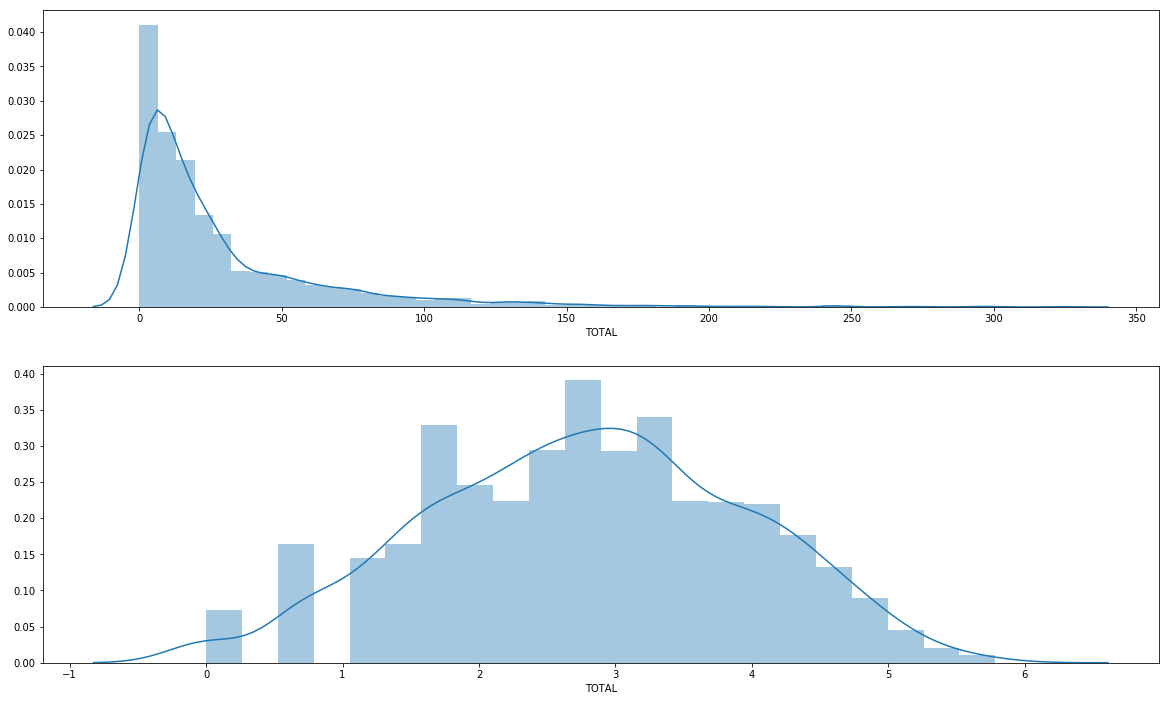

In [54]:
import seaborn as sns #여러 가지 그림 그릴 수 있다
import matplotlib.pylab as plt 
fig,axes = plt.subplots(2,1, figsize=(20,12))
sns.distplot(y,ax=axes[0])
sns.distplot(np.log1p(y),ax=axes[1])

## Neural Network 모델 학습

In [55]:
# import BatchNormalization
from keras.layers.normalization import BatchNormalization
model = Sequential()
#model.add(LSTM(24, input_shape=(14,1), kernel_initializer='normal', activation='relu'))
model.add(Dense(20, input_dim=14, kernel_initializer='normal', activation='relu')) # (timestep, feature)
model.add(Dropout(0.01))
#model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.02))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                300       
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 168       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 477
Trainable params: 477
Non-trainable params: 0
_________________________________________________________________


In [56]:
X_train_array = np.asarray(X_train)
X_valid_array = np.asarray(X_valid)
X_test_array = np.asarray(X_test)

In [57]:
X_train2 = np.reshape(X_train_array, (X_train.shape[0],  X_train.shape[1],1))
X_valid2 = np.reshape(X_valid_array, (X_valid.shape[0],  X_valid.shape[1],1))
X_test2 = np.reshape(X_test_array, (X_test.shape[0],  X_test.shape[1],1))

In [58]:
model.compile(loss='mse', optimizer=Adam(lr=1e-4), metrics=['mse','mae'])

In [59]:
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Train on 896 samples, validate on 225 samples
Epoch 1/150
896/896 [==============================] - 0s 506us/step - loss: 599.0149 - mean_squared_error: 599.0149 - mean_absolute_error: 14.4347 - val_loss: 5309.2755 - val_mean_squared_error: 5309.2755 - val_mean_absolute_error: 44.1057
Epoch 2/150
896/896 [==============================] - 0s 30us/step - loss: 591.0476 - mean_squared_error: 591.0476 - mean_absolute_error: 14.1963 - val_loss: 5282.5582 - val_mean_squared_error: 5282.5582 - val_mean_absolute_error: 43.8471
Epoch 3/150
896/896 [==============================] - 0s 24us/step - loss: 582.7674 - mean_squared_error: 582.7674 - mean_absolute_error: 13.9457 - val_loss: 5254.4021 - val_mean_squared_error: 5254.4021 - val_mean_absolute_error: 43.5800
Epoch 4/150
896/896 [==============================] - 0s 27us/step - loss: 574.5406 - mean_squared_error: 574.5406 - mean_absolute_error: 13.6928 - val_loss: 5223.5460 - val_mean_squared_error: 5223.5460 - val_mean_absolute_error: 4

Epoch 35/150
896/896 [==============================] - 0s 22us/step - loss: 342.9988 - mean_squared_error: 342.9988 - mean_absolute_error: 9.2661 - val_loss: 4123.4993 - val_mean_squared_error: 4123.4993 - val_mean_absolute_error: 33.7035
Epoch 36/150
896/896 [==============================] - 0s 26us/step - loss: 342.2221 - mean_squared_error: 342.2221 - mean_absolute_error: 9.2665 - val_loss: 4097.1124 - val_mean_squared_error: 4097.1124 - val_mean_absolute_error: 33.5158
Epoch 37/150
896/896 [==============================] - 0s 30us/step - loss: 338.7591 - mean_squared_error: 338.7591 - mean_absolute_error: 9.2936 - val_loss: 4073.6229 - val_mean_squared_error: 4073.6229 - val_mean_absolute_error: 33.3567
Epoch 38/150
896/896 [==============================] - 0s 22us/step - loss: 332.3871 - mean_squared_error: 332.3871 - mean_absolute_error: 9.2650 - val_loss: 4047.3033 - val_mean_squared_error: 4047.3033 - val_mean_absolute_error: 33.1771
Epoch 39/150
896/896 [==================

896/896 [==============================] - 0s 20us/step - loss: 268.4707 - mean_squared_error: 268.4707 - mean_absolute_error: 9.6002 - val_loss: 3376.2176 - val_mean_squared_error: 3376.2176 - val_mean_absolute_error: 30.0001
Epoch 104/150
896/896 [==============================] - 0s 20us/step - loss: 268.7636 - mean_squared_error: 268.7636 - mean_absolute_error: 9.6127 - val_loss: 3375.5556 - val_mean_squared_error: 3375.5556 - val_mean_absolute_error: 30.0101
Epoch 105/150
896/896 [==============================] - 0s 20us/step - loss: 267.2690 - mean_squared_error: 267.2690 - mean_absolute_error: 9.5878 - val_loss: 3367.6286 - val_mean_squared_error: 3367.6286 - val_mean_absolute_error: 29.9550
Epoch 106/150
896/896 [==============================] - 0s 21us/step - loss: 262.5561 - mean_squared_error: 262.5561 - mean_absolute_error: 9.5129 - val_loss: 3366.4232 - val_mean_squared_error: 3366.4232 - val_mean_absolute_error: 29.9639
Epoch 107/150
896/896 [===========================

896/896 [==============================] - 0s 27us/step - loss: 260.8780 - mean_squared_error: 260.8780 - mean_absolute_error: 9.2657 - val_loss: 3294.3397 - val_mean_squared_error: 3294.3397 - val_mean_absolute_error: 29.3654
Epoch 138/150
896/896 [==============================] - 0s 27us/step - loss: 266.4280 - mean_squared_error: 266.4280 - mean_absolute_error: 9.3676 - val_loss: 3293.3170 - val_mean_squared_error: 3293.3170 - val_mean_absolute_error: 29.3486
Epoch 139/150
896/896 [==============================] - 0s 20us/step - loss: 253.9261 - mean_squared_error: 253.9261 - mean_absolute_error: 9.1227 - val_loss: 3298.5225 - val_mean_squared_error: 3298.5225 - val_mean_absolute_error: 29.4099
Epoch 140/150
896/896 [==============================] - 0s 20us/step - loss: 255.1497 - mean_squared_error: 255.1497 - mean_absolute_error: 9.0950 - val_loss: 3294.0321 - val_mean_squared_error: 3294.0321 - val_mean_absolute_error: 29.3698
Epoch 141/150
896/896 [===========================

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


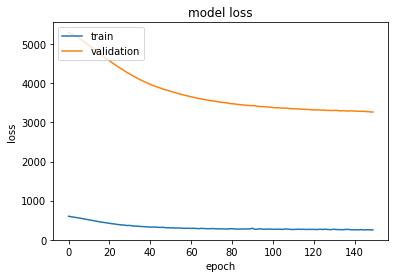

In [60]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Train, Valid, Test set으로 나눠서 예측하고 지표(RMSE,MAE,CORR,R2) 측정

In [61]:
y_pred_train = model.predict(X_train)
y_pred_valid= model.predict(X_valid)
y_pred_test = model.predict(X_test)

In [68]:
RMSE_2003_2011 = mean_squared_error(y_train,y_pred_train)**0.5
MAE_2003_2011 = mean_absolute_error(y_train,y_pred_train)
RMSE_2012_2014 = mean_squared_error(y_valid,y_pred_valid)**0.5
MAE_2012_2014 = mean_absolute_error(y_valid,y_pred_valid)
RMSE_2015_2017 = mean_squared_error(y_test,y_pred_test)**0.5
MAE_2015_2017 = mean_absolute_error(y_test,y_pred_test)

y_train_corr = np.corrcoef(y_train,y_pred_train[:,0])
y_valid_corr = np.corrcoef(y_valid,y_pred_valid[:,0])
y_test_corr = np.corrcoef(y_test,y_pred_test[:,0])

## 결과 그래프 시각화

In [69]:
#df_sigan = df
X_train_sigan = df[2:1123]
X_valid_sigan = df[1123:1496]
X_test_sigan = df[1496:]

X_train_sigan.kma_ymh = X_train_sigan.kma_year.astype(str) + "-" +X_train_sigan.kma_month.astype(str) +"-"+ X_train_sigan.kma_date.astype(str)
X_valid_sigan.kma_ymh = X_valid_sigan.kma_year.astype(str) + "-" +X_valid_sigan.kma_month.astype(str) +"-"+ X_valid_sigan.kma_date.astype(str)
X_test_sigan.kma_ymh = X_test_sigan.kma_year.astype(str) + "-" +X_test_sigan.kma_month.astype(str) +"-"+ X_test_sigan.kma_date.astype(str)

C:\Users\KHJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\KHJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys
C:\Users\KHJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


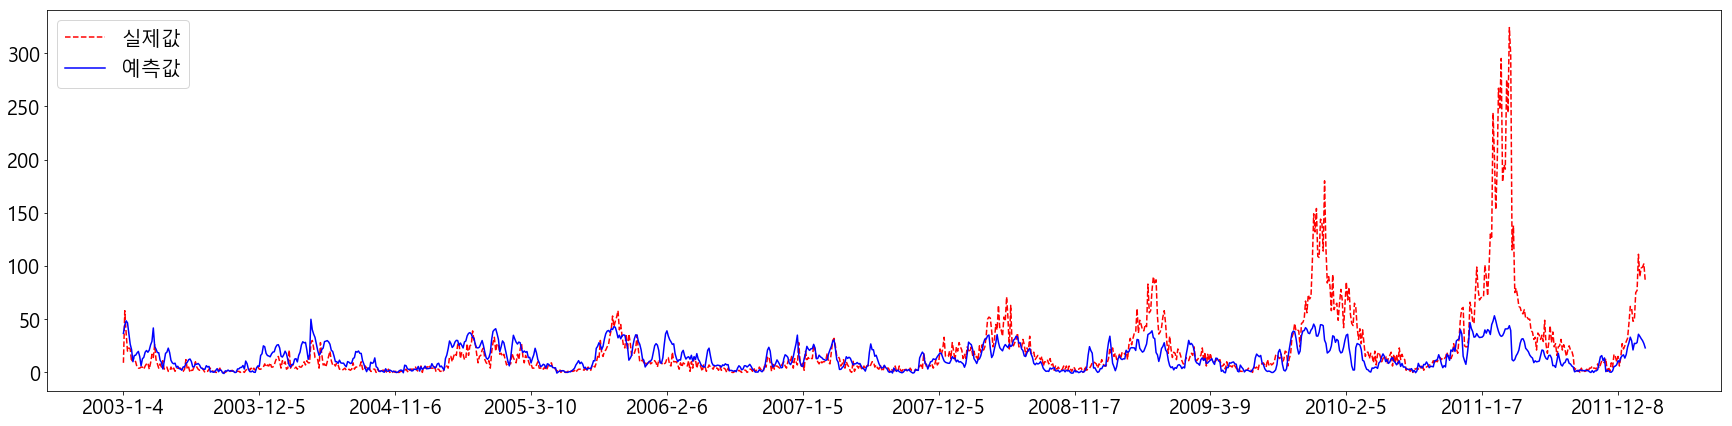

Train SET RMSE :  29.235110220279143
Train SET MAE :  12.91353858288886
Correlation Coefficient
[[1.         0.59451472]
 [0.59451472 1.        ]]
Training r2_score: 0.2593009612017795
Train


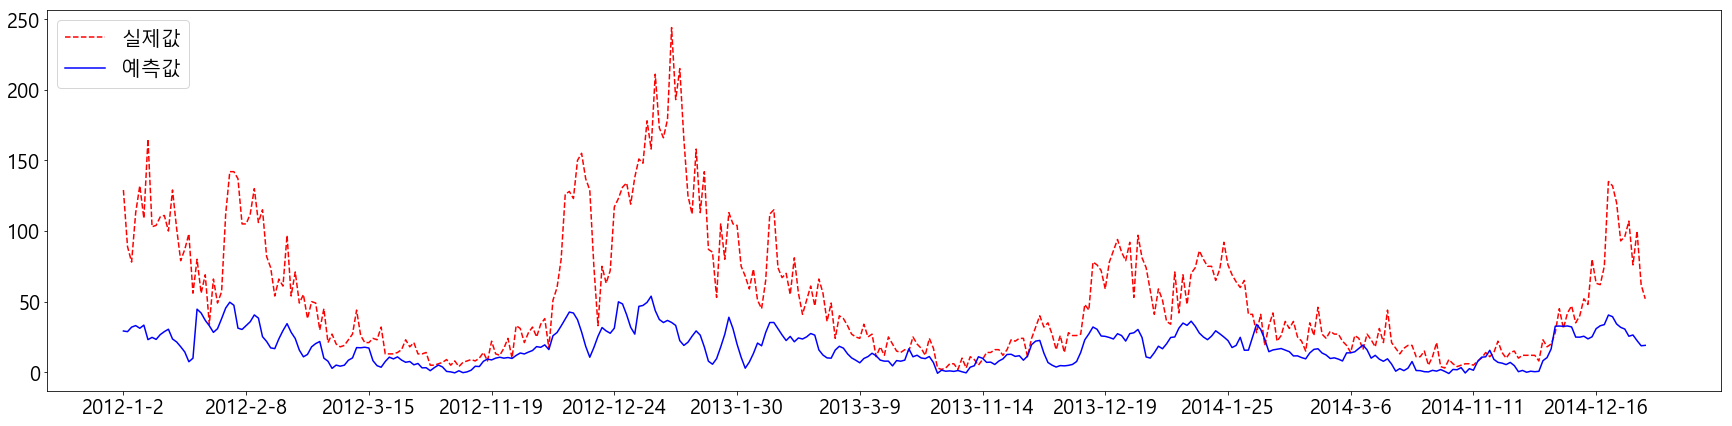

Validation SET RMSE :  50.511052089877886
Validation SET MAE :  35.1608641564886
Correlation Coefficient
[[1.        0.7639576]
 [0.7639576 1.       ]]
Validation r2_score: -0.26577540060166926
Valid


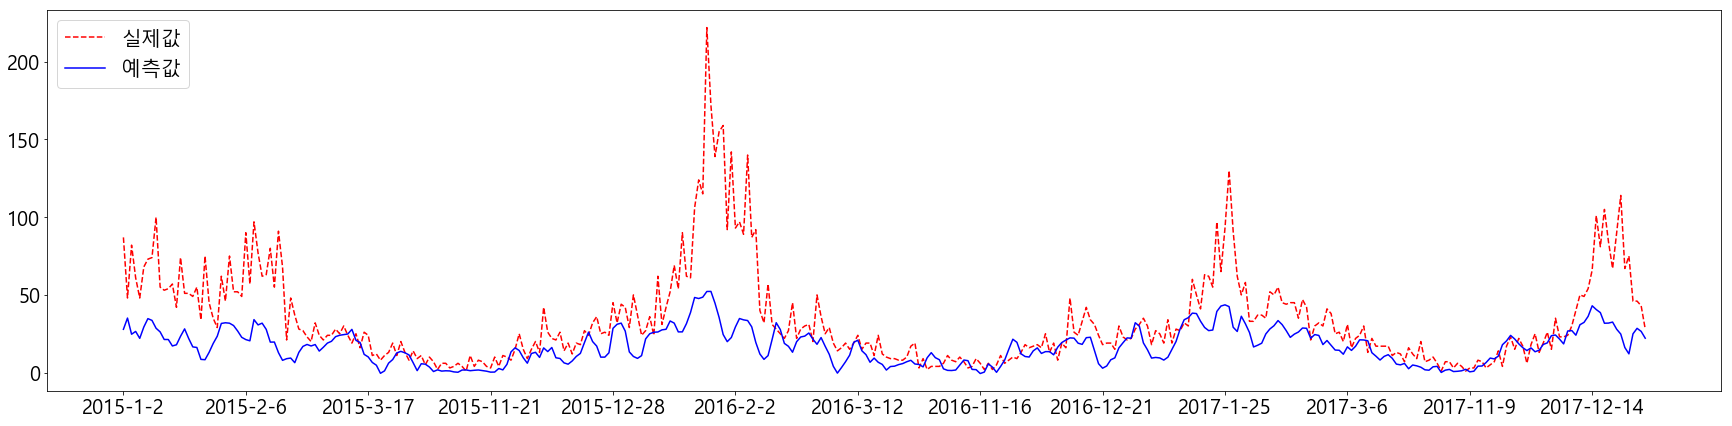

Test SET RMSE :  29.331592416850153
Test SET MAE :  18.001925711823816
Correlation Coefficient
[[1.         0.73894815]
 [0.73894815 1.        ]]
Test r2_score: 0.10772647022271209
Test


In [101]:
#plt.subplot(311)
plt.figure(figsize=(30, 7))
plt.plot( X_train_sigan.kma_ymh,y_train, 'r--',label='실제값')
plt.plot( X_train_sigan.kma_ymh,y_pred_train, 'b',label='예측값')
plt.xticks(np.arange(0,1120,100))
plt.legend(loc=2)
plt.show()
print("Train SET RMSE : ",RMSE_2003_2011)
print("Train SET MAE : ",MAE_2003_2011)
print("Correlation Coefficient")
print(y_train_corr)
print('Training r2_score: {}'.format(r2_score(y_train, y_pred_train)))

print("Train")

plt.figure(figsize=(30, 7))
plt.plot( X_valid_sigan.kma_ymh,y_valid, 'r--',label='실제값')
plt.plot( X_valid_sigan.kma_ymh,y_pred_valid, 'b',label='예측값')
plt.xticks(np.arange(0,380,30))
plt.legend(loc=2)
plt.show()
print("Validation SET RMSE : ",RMSE_2012_2014)
print("Validation SET MAE : ",MAE_2012_2014)
print("Correlation Coefficient")
print(y_valid_corr)
print('Validation r2_score: {}'.format(r2_score(y_valid, y_pred_valid)))

print("Valid")

#plt.subplot(312)
plt.figure(figsize=(30, 7))
plt.plot( X_test_sigan.kma_ymh,y_test, 'r--',label='실제값')
plt.plot( X_test_sigan.kma_ymh,y_pred_test, 'b',label='예측값')
plt.xticks(np.arange(0,380,30))
plt.legend(loc=2)
plt.show()


print("Test SET RMSE : ",RMSE_2015_2017)
print("Test SET MAE : ",MAE_2015_2017)
print("Correlation Coefficient")
print(y_test_corr)
print('Test r2_score: {}'.format(r2_score(y_test, y_pred_test)))
print("Test")

## 분석 후 모델 저장

In [71]:
model.save('cold_model.h5')

In [66]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax
# 2. 모델 불러오기
from keras.models import load_model
model2 = load_model('cold_model.h5')

In [67]:
y_pred_train = model2.predict(X_train)
y_pred_valid= model2.predict(X_valid)
y_pred_test = model2.predict(X_test)

In [99]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14,4)